<a href="https://colab.research.google.com/github/JeonJongDae/dinner_stock_AI/blob/main/3%EC%A3%BC%EC%B0%A8/%EB%B1%85%ED%81%AC%EB%9F%B0%EC%9D%B4_%EC%98%AC_%EA%B2%83%EC%9D%B8%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

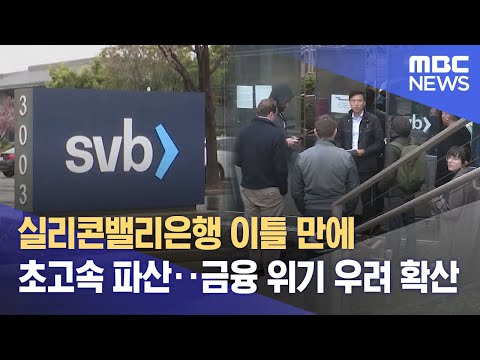

In [1]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("A40a6IZcS9o", width=500)
display(video)

# 환경설정

In [2]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# SIVB 데이터 가져오기

In [3]:
from pandas_datareader import data
import yfinance as yfin

yfin.pdr_override()

df = data.get_data_yahoo('SIVB',start='2023-01-01',end='2023-04-30')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,0.8770,1.170,0.877,0.98505,0.98505,16018917
2023-04-04,0.9900,1.080,0.912,0.97000,0.97000,6836192
2023-04-05,0.9680,1.040,0.881,0.91010,0.91010,4847379
2023-04-06,0.9290,0.929,0.750,0.79900,0.79900,6573026
2023-04-10,0.8076,0.849,0.500,0.60500,0.60500,13347180


## 데이터프레임 plot()

In [ ]:
'코드를 입력하세요'

## plotly


### line()

- 'Close' 시각화



In [6]:
import plotly.express as px

fig = px.line(df,  y='Close')
fig.show()

### bar()
- 'Volume' 시각화

In [7]:
fig = px.bar(df,y='Volume') #코드를 입력하세요'
fig.show()

### line() with Rageslider


In [12]:
fig = px.line(df, y='Close', title='Time Series with Rangeslider')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True,
            bgcolor="#636EFA",
            thickness=0.05
        ),
        type="date"
    )
)
#'코드를 입력하세요'
fig.show()

### line() with button()

In [ ]:
fig = px.line(df, y='Close', title='Time Series with Rangeslider')

fig.update_xaxes(
    '코드를 입력하세요'=True,
    '코드를 입력하세요'=dict(
        '코드를 입력하세요'=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

### subplot()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create figure with secondary y-axis
fig = '코드를 입력하세요'(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    '코드를 입력하세요'
)

# Add traces
fig.add_trace(
    '코드를 입력하세요'
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Close</b> axis", secondary_y=False)
fig.update_yaxes(title_text="<b>Volume</b> axis", secondary_y=True)

fig.show()

### candlestick()

In [ ]:
import pandas as pd
from datetime import datetime

fig = go.Figure('코드를 입력하세요')

fig.show()

# 주요 금융주 추이 확인하기

## 데이터 가져오기

In [ ]:
bank_tickers = ['SIVB',
                'JPM', # JP Morgan 
                'BAC', # Bank of America
                'CCBG', # Capital City Bank Group
                'AXP' # American Express Company
                 ]
df = pd.DataFrame()
for ticker in bank_tickers:
    temp = data.get_data_yahoo(ticker, start = '2020-01-01')['Close']
    df = pd.merge(df, temp, right_index=True, left_index=True, how='outer', suffixes=('', ticker))

In [ ]:
df

`Close`를 제외하고 티커로 컬럼명 바꾸기 

In [ ]:
df.set_axis(labels=bank_tickers, axis=1, inplace = True)
df.head()

## 5개 금융주 시각화하기

In [ ]:
import plotly.express as px
fig = px.line(df, x=df.index, y=df.columns)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## 스케일 맞춰주기

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = '코드를 입력하세요'
scaled_data = scaler.fit_transform('코드를 입력하세요')
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns, index = df.index)

In [ ]:
fig = px.line(scaled_df, x=scaled_df.index, y=scaled_df.columns)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()